In [1]:
import pandas as pd
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv('test.csv')
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Summary statistics for numerical variables
summary_stats = data_train.describe()

# Display summary statistics
summary_stats


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# What is the overall subscription rate for term deposits?

In [7]:
import pandas as pd

# Assuming your dataset is stored in a variable named 'df'
# df = pd.read_csv('your_dataset.csv')  # Load your dataset if not already loaded

# Calculate the overall subscription rate
subscription_rate = data_train['y'].value_counts(normalize=True)['yes']

# Display the result
print(f"Overall Subscription Rate: {subscription_rate:.2%}")

# Calculate the overall subscription rate for the testing set
test_subscription_rate = data_test['y'].value_counts(normalize=True)['yes']
print(f"Testing Set Subscription Rate: {test_subscription_rate:.2%}")

Overall Subscription Rate: 11.70%
Testing Set Subscription Rate: 11.52%


# Which demographic groups are more likely to subscribe to term deposits?

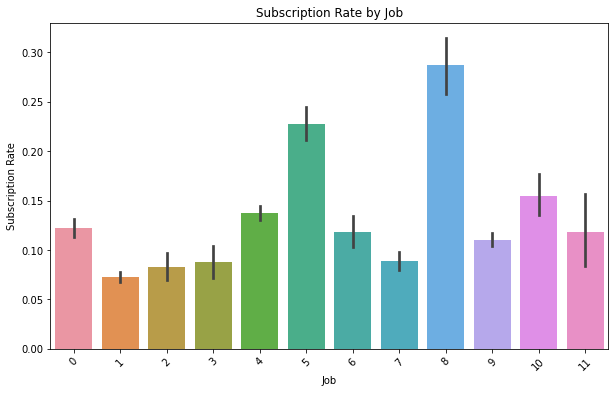

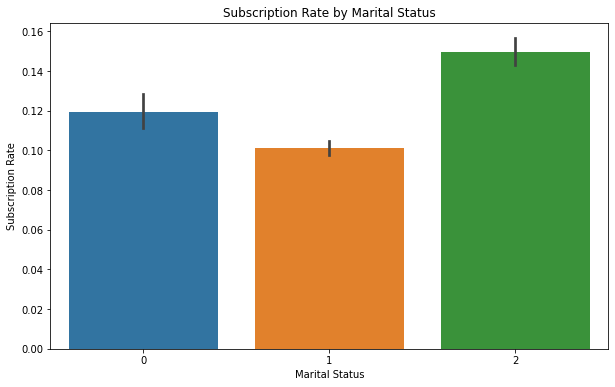

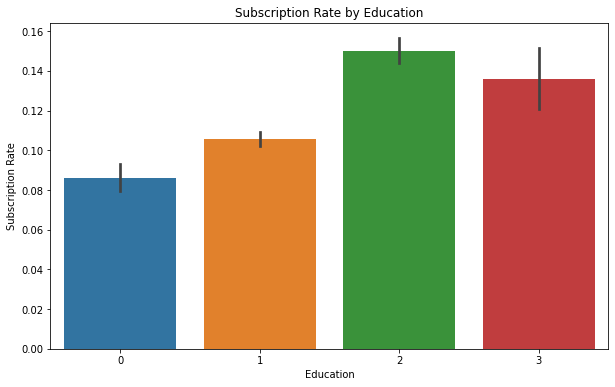

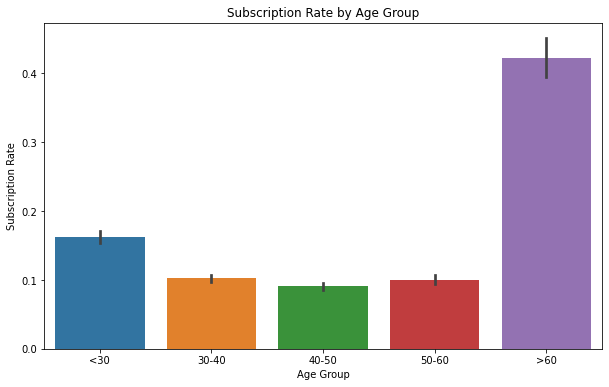

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Sample mappings from numerical codes to descriptive labels
# You will need to replace these with the actual mappings from your dataset
job_mapping = {1: 'Admin', 2: 'Blue-collar', 3: 'Entrepreneur', 4: 'Housemaid', 5: 'Management', 6: 'Retired', 7: 'Self-employed', 8: 'Services', 9: 'Student', 10: 'Technician', 11: 'Unemployed', 12: 'Unknown'}
marital_mapping = {1: 'Divorced', 2: 'Married', 3: 'Single'}
education_mapping = {1: 'Primary Education', 2: 'Secondary Education', 3: 'Tertiary Education', 4: 'Unknown'}

# Map the numerical codes to descriptive labels
data_train['job_label'] = data_train['job'].map(job_mapping)
data_train['marital_label'] = data_train['marital'].map(marital_mapping)
data_train['education_label'] = data_train['education'].map(education_mapping)

# Assuming 'y' is the column indicating subscription status ('yes' or 'no')
# Convert 'y' to numeric if not already done
data_train['y_numeric'] = data_train['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Analyzing subscription rates across different jobs
plt.figure(figsize=(10, 6))
job_plot = sns.barplot(x='job', y='y_numeric', data=data_train)
job_plot.set_xticklabels(job_plot.get_xticklabels(), rotation=45)  # Automatically use job labels from dataset
plt.title('Subscription Rate by Job')
plt.ylabel('Subscription Rate')
plt.xlabel('Job')
plt.show()

# Analyzing subscription rates across different marital statuses
plt.figure(figsize=(10, 6))
marital_plot = sns.barplot(x='marital', y='y_numeric', data=data_train)
marital_plot.set_xticklabels(marital_plot.get_xticklabels())  # Automatically use marital status labels from dataset
plt.title('Subscription Rate by Marital Status')
plt.ylabel('Subscription Rate')
plt.xlabel('Marital Status')
plt.show()

# Analyzing subscription rates across different education levels
plt.figure(figsize=(10, 6))
education_plot = sns.barplot(x='education', y='y_numeric', data=data_train)
education_plot.set_xticklabels(education_plot.get_xticklabels())  # Automatically use education labels from dataset
plt.title('Subscription Rate by Education')
plt.ylabel('Subscription Rate')
plt.xlabel('Education')
plt.show()

# Analyzing subscription rates by age groups
# Creating age groups for better visualization
data_train['age_group'] = pd.cut(data_train['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])
plt.figure(figsize=(10, 6))
age_plot = sns.barplot(x='age_group', y='y_numeric', data=data_train)
plt.title('Subscription Rate by Age Group')
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.show()


# How does the communication type (contact) impact subscription rates?

In [25]:
# Function to calculate subscription rates for different communication types
def calculate_subscription_rates_by_contact(data):
    # Calculate subscription rates based on communication type
    subscription_rates = data.groupby('contact')['y'].value_counts(normalize=True)[:, 'yes']
    print("Subscription Rates based on Contact:")
    print(subscription_rates)

# Calculate subscription rates for the training set
print("Training Set:")
calculate_subscription_rates_by_contact(data_train)

# Calculate subscription rates for the testing set
print("\nTesting Set:")
calculate_subscription_rates_by_contact(data_test)

Training Set:
Subscription Rates based on Contact:
contact
cellular     0.149189
telephone    0.134205
unknown      0.040707
Name: y, dtype: float64

Testing Set:
Subscription Rates based on Contact:
contact
cellular     0.143646
telephone    0.146179
unknown      0.046073
Name: y, dtype: float64


# What is the distribution of contact durations for clients who subscribed compared to those who did not?

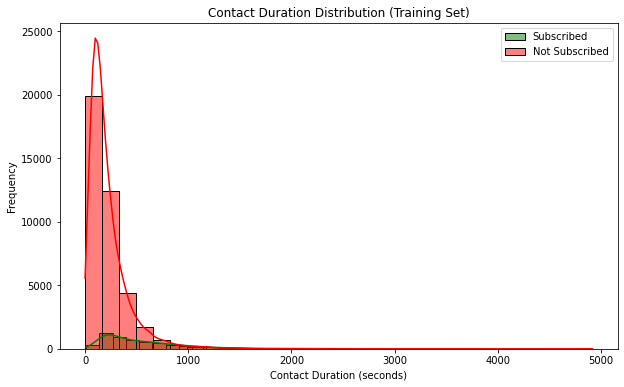

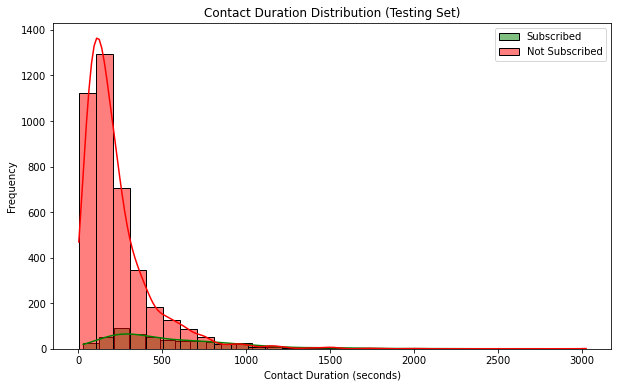

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Function to visualize contact duration distribution for subscribed and non-subscribed clients
def visualize_contact_duration_distribution(data, title):
    plt.figure(figsize=(10, 6))
    
    # Plot distribution for clients who subscribed
    sns.histplot(data[data['y'] == 'yes']['duration'], kde=True, label='Subscribed', color='green', bins=30)
    
    # Plot distribution for clients who did not subscribe
    sns.histplot(data[data['y'] == 'no']['duration'], kde=True, label='Not Subscribed', color='red', bins=30)
    
    plt.title(title)
    plt.xlabel('Contact Duration (seconds)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Visualize contact duration distribution for the training set
visualize_contact_duration_distribution(data_train, 'Contact Duration Distribution (Training Set)')

# Visualize contact duration distribution for the testing set
visualize_contact_duration_distribution(data_test, 'Contact Duration Distribution (Testing Set)')


# Are clients with housing or personal loans more or less likely to subscribe to term deposits?

In [28]:
import pandas as pd



# Function to calculate subscription rates based on loan types
def calculate_subscription_rates_by_loans(data, loan_type, title):
    subscription_rates = data.groupby(loan_type)['y'].value_counts(normalize=True)[:, 'yes']
    print(f"\nSubscription Rates based on {loan_type}:")
    print(subscription_rates)

# Calculate subscription rates for clients with housing loans in the training set
calculate_subscription_rates_by_loans(data_train, 'housing', 'Subscription Rates for Clients with Housing Loans (Training Set)')

# Calculate subscription rates for clients without housing loans in the training set
calculate_subscription_rates_by_loans(data_train, 'loan', 'Subscription Rates for Clients without Housing Loans (Training Set)')

# Calculate subscription rates for clients with housing loans in the testing set
calculate_subscription_rates_by_loans(data_test, 'housing', 'Subscription Rates for Clients with Housing Loans (Testing Set)')

# Calculate subscription rates for clients without housing loans in the testing set
calculate_subscription_rates_by_loans(data_test, 'loan', 'Subscription Rates for Clients without Housing Loans (Testing Set)')



Subscription Rates based on housing:
housing
no     0.167024
yes    0.077000
Name: y, dtype: float64

Subscription Rates based on loan:
loan
no     0.126557
yes    0.066814
Name: y, dtype: float64

Subscription Rates based on housing:
housing
no     0.153415
yes    0.085971
Name: y, dtype: float64

Subscription Rates based on loan:
loan
no     0.124804
yes    0.062229
Name: y, dtype: float64


# How do previous marketing campaign outcomes (poutcome) influence current subscription rates?

In [29]:
import pandas as pd



# Function to calculate subscription rates based on previous campaign outcomes
def calculate_subscription_rates_by_poutcome(data, title):
    subscription_rates = data.groupby('poutcome')['y'].value_counts(normalize=True)[:, 'yes']
    print(f"\nSubscription Rates based on Previous Campaign Outcome:")
    print(subscription_rates)

# Calculate subscription rates for different outcomes of previous campaigns in the training set
calculate_subscription_rates_by_poutcome(data_train, 'Subscription Rates based on Previous Campaign Outcome (Training Set)')

# Calculate subscription rates for different outcomes of previous campaigns in the testing set
calculate_subscription_rates_by_poutcome(data_test, 'Subscription Rates based on Previous Campaign Outcome (Testing Set)')



Subscription Rates based on Previous Campaign Outcome:
poutcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091615
Name: y, dtype: float64

Subscription Rates based on Previous Campaign Outcome:
poutcome
failure    0.128571
other      0.192893
success    0.643411
unknown    0.090958
Name: y, dtype: float64


# What is the average number of days since the last contact (pdays) for clients who subscribed compared to those who did not?

In [30]:
import pandas as pd


# Function to calculate average days since the last contact for subscribed and non-subscribed clients
def calculate_average_pdays(data, title):
    # Calculate average days since the last contact for clients who subscribed
    subscribed_avg_pdays = data[data['y'] == 'yes']['pdays'].mean()

    # Calculate average days since the last contact for clients who did not subscribe
    not_subscribed_avg_pdays = data[data['y'] == 'no']['pdays'].mean()

    print(f"\nAverage Days since the Last Contact - Subscribed: {subscribed_avg_pdays:.2f} days")
    print(f"Average Days since the Last Contact - Not Subscribed: {not_subscribed_avg_pdays:.2f} days")

# Calculate average days since the last contact for the training set
calculate_average_pdays(data_train, 'Average Days since the Last Contact (Training Set)')

# Calculate average days since the last contact for the testing set
calculate_average_pdays(data_test, 'Average Days since the Last Contact (Testing Set)')



Average Days since the Last Contact - Subscribed: 68.70 days
Average Days since the Last Contact - Not Subscribed: 36.42 days

Average Days since the Last Contact - Subscribed: 68.64 days
Average Days since the Last Contact - Not Subscribed: 36.01 days


# Is there a correlation between the balance in a client's account and their likelihood of subscribing to a term deposit?

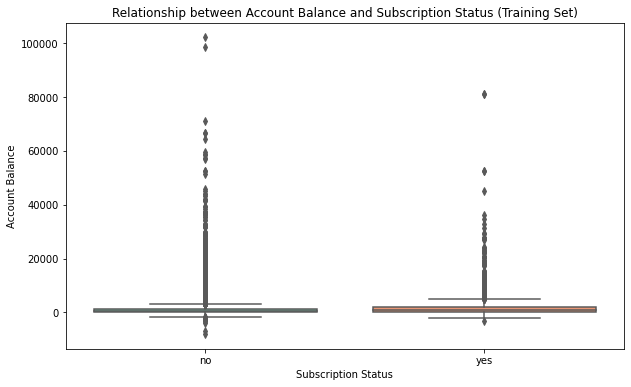

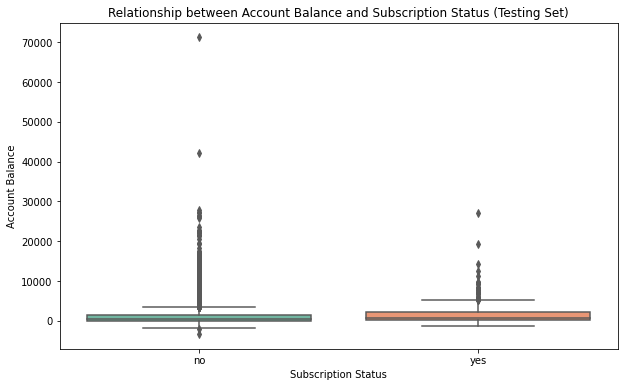

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Function to visualize the relationship between account balance and subscription status
def visualize_balance_vs_subscription(data, title):
    plt.figure(figsize=(10, 6))
    
    # Plot boxplot to visualize the distribution of account balance for subscribed and non-subscribed clients
    sns.boxplot(x='y', y='balance', data=data, palette='Set2')
    
    plt.title(title)
    plt.xlabel('Subscription Status')
    plt.ylabel('Account Balance')
    plt.show()

# Visualize the relationship between account balance and subscription status for the training set
visualize_balance_vs_subscription(data_train, 'Relationship between Account Balance and Subscription Status (Training Set)')

# Visualize the relationship between account balance and subscription status for the testing set
visualize_balance_vs_subscription(data_test, 'Relationship between Account Balance and Subscription Status (Testing Set)')


# How does the month and day of the week of the last contact influence subscription rates?

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Function to get the best and worst three for each category
def get_best_and_worst(data, time_column, title):
    subscription_rates = data.groupby(time_column)['y'].value_counts(normalize=True)[:, 'yes']
    
    # Sort the subscription rates
    sorted_rates = subscription_rates.sort_values(ascending=False)
    
    # Get the best and worst three
    best_three = sorted_rates.head(3)
    worst_three = sorted_rates.tail(3)
    
    print(f"\nBest Three {time_column} for Subscription Rates:")
    print(best_three)
    
    print(f"\nWorst Three {time_column} for Subscription Rates:")
    print(worst_three)

# Get the best and worst three months for the training set
get_best_and_worst(data_train, 'month', 'Best and Worst Three Months for Subscription Rates (Training Set)')

# Get the best and worst three days of the week for the training set
get_best_and_worst(data_train, 'day', 'Best and Worst Three Days of the Week for Subscription Rates (Training Set)')

# Get the best and worst three months for the testing set
get_best_and_worst(data_test, 'month', 'Best and Worst Three Months for Subscription Rates (Testing Set)')

# Get the best and worst three days of the week for the testing set
get_best_and_worst(data_test, 'day', 'Best and Worst Three Days of the Week for Subscription Rates (Testing Set)')



Best Three month for Subscription Rates:
month
mar    0.519916
dec    0.467290
sep    0.464594
Name: y, dtype: float64

Worst Three month for Subscription Rates:
month
jan    0.101212
jul    0.090935
may    0.067195
Name: y, dtype: float64

Best Three day for Subscription Rates:
day
1     0.279503
10    0.230916
30    0.173052
Name: y, dtype: float64

Worst Three day for Subscription Rates:
day
31    0.071540
20    0.069767
19    0.069437
Name: y, dtype: float64

Best Three month for Subscription Rates:
month
oct    0.462500
dec    0.450000
mar    0.428571
Name: y, dtype: float64

Worst Three month for Subscription Rates:
month
nov    0.100257
jul    0.086402
may    0.066524
Name: y, dtype: float64

Best Three day for Subscription Rates:
day
1     0.370370
10    0.280000
24    0.222222
Name: y, dtype: float64

Worst Three day for Subscription Rates:
day
31    0.067797
20    0.058366
29    0.057143
Name: y, dtype: float64


# Which features have the most significant impact on predicting term deposit subscriptions?

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Converting 'y' to numeric format: 'yes' to 1 and 'no' to 0 in both data_train and data_test
data_train['y_numeric'] = data_train['y'].apply(lambda x: 1 if x == 'yes' else 0)
data_test['y_numeric'] = data_test['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Preprocessing: Encoding categorical variables in both data_train and data_test datasets
categorical_features = data_train.select_dtypes(include=['object']).columns.drop('y')
for feature in categorical_features:
    le = LabelEncoder()
    data_train[feature] = le.fit_transform(data_train[feature])
    data_test[feature] = le.transform(data_test[feature])

# Features and target variable setup
# Excluding 'y_numeric' from the features
X_train = data_train.drop(['y', 'y_numeric'], axis=1)
y_train = data_train['y_numeric']
X_test = data_test.drop(['y', 'y_numeric'], axis=1)
y_test = data_test['y_numeric']

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Determining feature importance
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Displaying the feature importances
print(feature_importances)


Model Accuracy: 1.0
           importance
duration     0.290735
balance      0.110094
age          0.102841
day          0.090124
month        0.087655
poutcome     0.054070
job          0.048932
pdays        0.048895
campaign     0.037817
education    0.027977
housing      0.025519
marital      0.021824
previous     0.021358
contact      0.020250
loan         0.010162
default      0.001747


In [6]:
# Exclude 'duration' from the features
X = data_train.drop(['y', 'y_numeric', 'duration'], axis=1)
y = data_train['y_numeric']




In [9]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, zero_division=0),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score),
           'roc_auc': 'roc_auc'}

# Perform cross-validation
cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False, n_jobs=-1)

# Display the results
for metric in scoring.keys():
    print(f"CV {metric.capitalize()}: Mean = {np.mean(cv_results['test_' + metric])}, Std = {np.std(cv_results['test_' + metric])}")


CV Accuracy: Mean = 0.8922607518752781, Std = 0.001967917016801525
CV Precision: Mean = 0.6164490091775978, Std = 0.025550057746870237
CV Recall: Mean = 0.20968071350775191, Std = 0.010050436759687727
CV F1: Mean = 0.3128257455094504, Std = 0.013358544181704742
CV Roc_auc: Mean = 0.7837826958551419, Std = 0.00866620191643928
